In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([6,16,26,36,46,56]).reshape((-1,1))
y = np.array([4,23,10,12,22,35])

model = LinearRegression().fit(x,y)

r_sq = model.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:',model.intercept_)
print('slope:',model.coef_)

y_pred = model.predict(x)
print('Predict response:', y_pred, sep='\n')

coefficient of determination: 0.5417910447761195
intercept: 4.026666666666664
slope: [0.44]
Predict response:
[ 6.66666667 11.06666667 15.46666667 19.86666667 24.26666667 28.66666667]


Value of the oefficients: 
 [875.72295475]
Mean square error: 4254.615583911326
Coefficient of determination: 0.3276174567207636


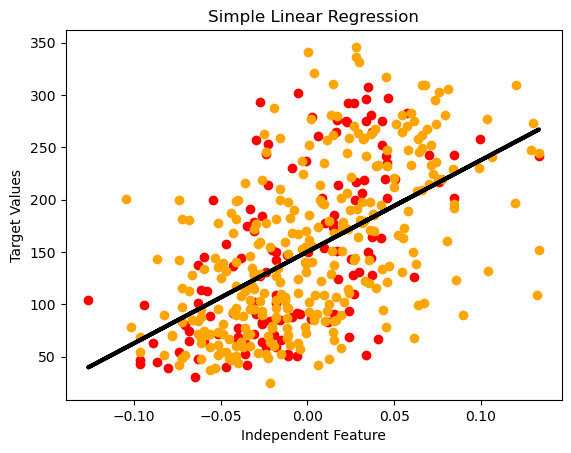

In [16]:
# Python code on sklearn linear regression example  
  
# Importing required libraries  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.datasets import load_diabetes  
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error, r2_score  
  
# Loading the sklearn diabetes dataset  
X, Y = load_diabetes(return_X_y=True)  
  
# Taking only one feature to perform simple linear regression  
X = X[:,8].reshape(-1,1)  
  
# Splitting the dependent and independent features of the dataset into training and testing dataset  
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 10 )  
  
# Creating an instance for the linear regression model of sklearn  
lr = LinearRegression()  
  
# Training the model by passing the dependent and independent features of the training dataset  
lr.fit( X_train, Y_train )  
  
# Creating an array of predictions made by the model for the unseen or test dataset  
Y_pred = lr.predict( X_test )  
  
# The value of the coefficients for the independent feature through the multiple regression model  
print("Value of the oefficients: \n", lr.coef_)  
  
# The value of the mean squared error  
print(f"Mean square error: {mean_squared_error( Y_test, Y_pred)}")  
  
# The value of the coefficient of determination, i.e., R-square score of the model  
print(f"Coefficient of determination: {r2_score( Y_test, Y_pred )}")  
  
# Plotting the output  
plt.scatter(X_test, Y_test, color = "red", label = "original data")  
plt.plot(X_test, Y_pred, color = "black", linewidth=3, label = "regression line") 
plt.scatter(X_train, Y_train, color = "orange", label = "original data")  
plt.xlabel("Independent Feature")  
plt.ylabel("Target Values")  
plt.title("Simple Linear Regression")  
plt.show()

In [2]:
import turtle
import random

#  @python.coder_
WIDTH = 500
HEIGHT = 500
FOOD_SIZE = 10
DELAY = 100
offsets = {
    "up": (0, 20),
    "down": (0, -20),
    "left": (-20, 0),
    "right": (20, 0)
}
def reset():
    global snake, snake_direction, food_pos, pen
    snake = [[0, 0], [0, 20], [0, 40], [0, 50], [0, 60]]
    snake_direction = "up"
    food_pos = get_random_food_pos()
    food.goto(food_pos)
    # screen.update() Only needed if we are fussed about drawing food before next call to `draw_snake()`.
    move_snake()


def move_snake():
    global snake_direction

    #  Next position for head of snake.
    new_head = snake[-1].copy()
    new_head[0] = snake[-1][0] + offsets[snake_direction][0]
    new_head[1] = snake[-1][1] + offsets[snake_direction][1]

    # Check self-collision
    if new_head in snake[:-1]:
        reset()
    else:

        snake.append(new_head)
        if not food_collision():
            snake.pop(0)  # Keep the snake the same length unless fed.

        #  Allow screen wrapping
        if snake[-1][0] > WIDTH / 2:
            snake[-1][0] -= WIDTH
        elif snake[-1][0] < - WIDTH / 2:
            snake[-1][0] += WIDTH
        elif snake[-1][1] > HEIGHT / 2:
            snake[-1][1] -= HEIGHT
        elif snake[-1][1] < -HEIGHT / 2:
            snake[-1][1] += HEIGHT

        # Clear previous snake stamps
        pen.clearstamps()

        # Draw snake
        for segment in snake:
            pen.goto(segment[0], segment[1])
            pen.stamp()

        # Refresh screen
        screen.update()

        # Rinse and repeat
        turtle.ontimer(move_snake, DELAY)


def food_collision():
    global food_pos
    if get_distance(snake[-1], food_pos) < 20:
        food_pos = get_random_food_pos()
        food.goto(food_pos)
        return True
    return False


def get_random_food_pos():
    x = random.randint(- WIDTH / 2 + FOOD_SIZE, WIDTH / 2 - FOOD_SIZE)
    y = random.randint(- HEIGHT / 2 + FOOD_SIZE, HEIGHT / 2 - FOOD_SIZE)
    return (x, y)


def get_distance(pos1, pos2):
    x1, y1 = pos1
    x2, y2 = pos2
    distance = ((y2 - y1) ** 2 + (x2 - x1) ** 2) ** 0.5
    return distance


def go_up():
    global snake_direction
    if snake_direction != "down":
        snake_direction = "up"


def go_right():
    global snake_direction
    if snake_direction != "left":
        snake_direction = "right"


def go_down():
    global snake_direction
    if snake_direction != "up":
        snake_direction = "down"


def go_left():
    global snake_direction
    if snake_direction != "right":
        snake_direction = "left"


# Screen
screen = turtle.Screen()
screen.setup(WIDTH, HEIGHT)
screen.title("Snake  Game")
screen.bgcolor("black")
screen.setup(500, 500)
screen.tracer(0)

# Pen
pen = turtle.Turtle("square")
pen.penup()
pen.pencolor("yellow")

# Food
food = turtle.Turtle()
food.shape("circle")
food.color("red")
food.shapesize(FOOD_SIZE / 20)  # Default size of turtle "square" shape is 20.
food.penup()

# Event handlers
screen.listen()
screen.onkey(go_up, "Up")
screen.onkey(go_right, "Right")
screen.onkey(go_down, "Down")
screen.onkey(go_left, "Left")

# Let's go
reset()
turtle.done()


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

def preprocess_mnist():
    # Load the MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalize the pixel values to the range [0, 1]
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Reshape the images to have a single channel (grayscale)
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    # One-hot encode the labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return X_train, y_train, X_test, y_test

if __name__ == "__main__":
    X_train, y_train, X_test, y_test = preprocess_mnist()
    print("MNIST dataset preprocessed!")
    print("Training set shape:", X_train.shape)
    print("Training labels shape:", y_train.shape)
    print("Test set shape:", X_test.shape)
    print("Test labels shape:", y_test.shape)


MNIST dataset preprocessed!
Training set shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test set shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)
